In [3]:
from collections import defaultdict
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re

import seaborn as sns

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"
OUTPUT_PATH = "../data/3_c/{}.csv"

In [4]:
seasons = "2014-2017"
RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons))
TE_df = pd.read_csv(INPUT_PATH.format("TE", seasons))
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons))

* **–1**. A **perfect negative** linear relationship
* **–0.70**. A **strong negative** linear relationship
* **–0.50**. A **moderate negative** relationship
* **–0.30**. A **weak negative** linear relationship
* **0. No linear relationship**
* **+0.30**. A **weak positive** linear relationship
* **+0.50**. A **moderate positive** relationship
* **+0.70**. A **strong positive** linear relationship
* **+1**. A **perfect positive** linear relationship


# Receiving Stats

In [10]:
def show_corr(df):
    df = df.loc[:,('next_fp', 'fp', 'rec_td', 'rec_target', 'rec_rec', 'rec_yd')]
    print(df.corr()['next_fp'].sort_values(ascending=False))
    print(df.corr()['fp'].sort_values(ascending=False))
    sns.heatmap(df.corr(), cmap="seismic", annot=True);

## RB

next_fp       1.000000
fp            0.261144
rec_target    0.105833
rec_yd        0.091170
rec_rec       0.090848
rec_td        0.013421
Name: next_fp, dtype: float64
fp            1.000000
rec_td        0.339080
rec_yd        0.313651
next_fp       0.261144
rec_rec       0.207428
rec_target    0.183549
Name: fp, dtype: float64


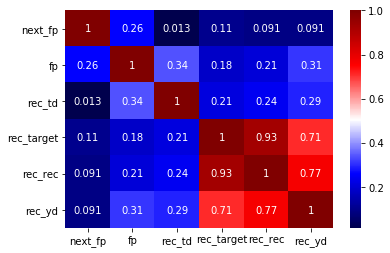

In [11]:
show_corr(RB_df)

## WR

next_fp       1.000000
rec_target    0.132683
rec_yd        0.120335
rec_rec       0.107857
fp            0.088050
rec_td        0.020131
Name: next_fp, dtype: float64
fp            1.000000
rec_td        0.749569
rec_yd        0.691231
rec_rec       0.441081
rec_target    0.348359
next_fp       0.088050
Name: fp, dtype: float64


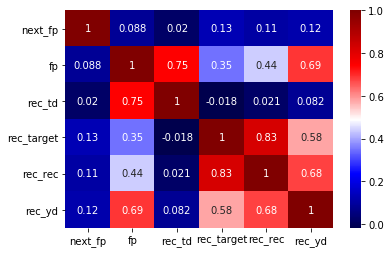

In [12]:
show_corr(WR_df)

## TE

next_fp       1.000000
rec_target    0.294585
rec_rec       0.264703
rec_yd        0.248172
fp            0.201323
rec_td        0.085070
Name: next_fp, dtype: float64
fp            1.000000
rec_td        0.819841
rec_yd        0.795718
rec_rec       0.684672
rec_target    0.611152
next_fp       0.201323
Name: fp, dtype: float64


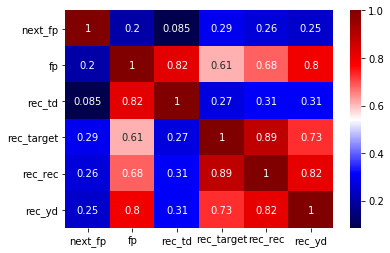

In [13]:
show_corr(TE_df)

## All

next_fp       1.000000
fp            0.357623
rec_target    0.223003
rec_rec       0.210561
rec_yd        0.209011
rec_td        0.080156
Name: next_fp, dtype: float64
fp            1.000000
rec_td        0.564563
rec_yd        0.518493
rec_rec       0.424193
rec_target    0.364943
next_fp       0.357623
Name: fp, dtype: float64


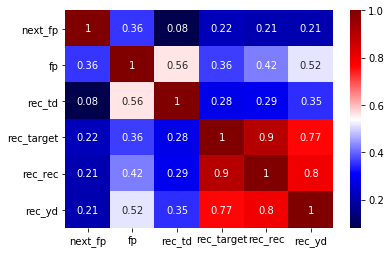

In [14]:
col = ['next_fp', 'fp', 'rec_td', 'rec_target', 'rec_rec', 'rec_yd']

combined = RB_df[col].append(
    WR_df[col]).append(TE_df[col])
show_corr(combined)

* Tightends have a weak relationship between rec_target and next_fp, other positions not so much.
* rec_rec, rec_yd, and rec_target are probably collinear.